In [1]:
#! امپورت کردن کتابخانه های مورد نیاز برای مدل سازی
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [2]:
data = pd.read_csv('cardata.csv')#! وارد کردن دیتا مورد بررسی

In [3]:
df = pd.DataFrame(data)#! تبدیل کردن دیتا به دیتافریم
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.drop('Car_Name', axis=1,inplace=True)#!  حذف کردن ستون اسم خودرو


In [5]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [6]:
df.describe()#! اطلاعات کلی در مورد دیتاست موردنظر

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


<h2>ساخت یه ستون بر سال سال ساخت خودرو به اسم سن خودرو<h2>

In [7]:
#! تواید سن از روی سال ساخت
Age = []
for i in df.Year:
    Age.append(i - ((max(df.Year))+1))

In [8]:

df2 = pd.DataFrame({'Age' : np.abs(Age)})#! مثبت کردن سن ها


In [9]:
df2.describe()#! بررسی دیتاستی که ساختیم

,Age
count,301.000000
mean,5.372093
std,2.891554
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,16.000000


In [10]:
df.insert(1, 'Age', df2) #! متصل کردن دیتاست جدید به دیتاست قبلی


In [11]:
df #! دیتاست اپدیت شده

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,2016,3,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,2,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [12]:
df.describe() #!  بررسی دیتاست اپدیت شده

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,5.372093,4.661296,7.628472,36947.205980,0.043189
std,2.891554,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,1.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,3.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,5.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,7.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,16.000000,35.000000,92.600000,500000.000000,3.000000


<h1> دیتاساینس و بررسی اینکه ایا در ساختار نویز وجود دارد یا خیر!<h1>

با افزایش سن قیمت فروش خودرو کاهش پیدا کرده


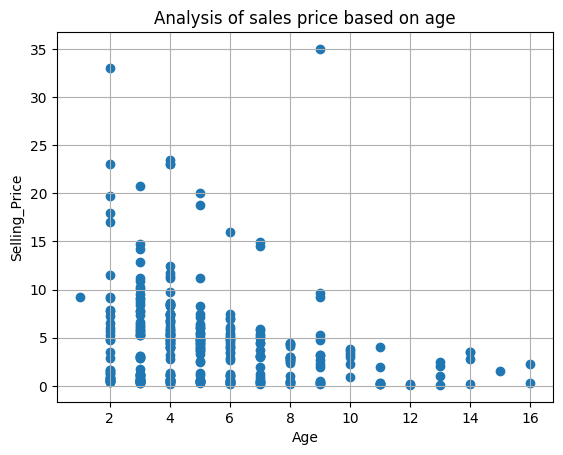

In [13]:
plt.title('Analysis of sales price based on age')
plt.scatter(df.Age, df.Selling_Price)
plt.xlabel('Age')
plt.ylabel('Selling_Price')
plt.grid()
plt.savefig('Age_Selling_Price', bbox_inches= 'tight', pad_inches=1)
plt.show()

هرچه قدمت حال حاظر خودرو بیشتر باشه قیمت فروش هم بیشتر میشه

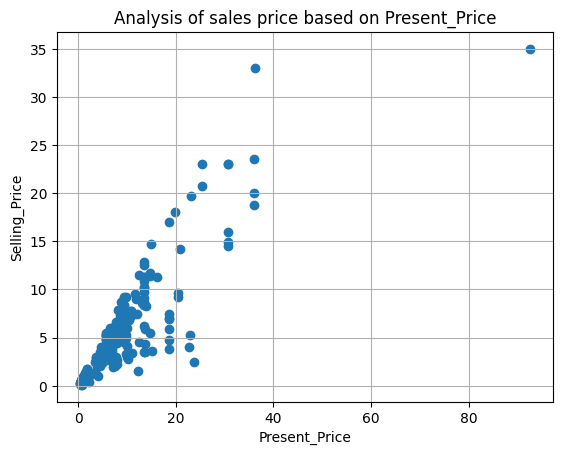

In [14]:
plt.title('Analysis of sales price based on Present_Price')
plt.scatter(df.Present_Price, df.Selling_Price)
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')
plt.grid()
plt.savefig('Present_Price_Selling_Price', bbox_inches= 'tight', pad_inches=1)
plt.show()

تو ۱۰۰۰۰۰ کیلومتر اول پراکندگی زیاد است و قیمت از ۰/۱ تا ۳۵ متغییر است

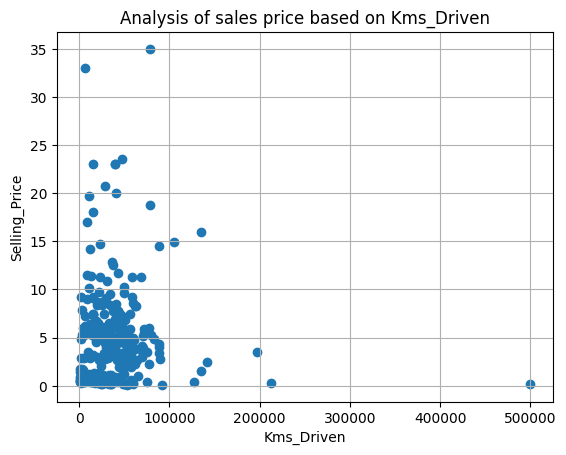

In [15]:
plt.title('Analysis of sales price based on Kms_Driven')
plt.scatter(df.Kms_Driven, df.Selling_Price)
plt.xlabel('Kms_Driven')
plt.ylabel('Selling_Price')
plt.grid()
plt.savefig('Kms_Driven_Selling_Price', bbox_inches= 'tight', pad_inches=1)
plt.show()

در اینجا خودرو با سوخت دیزل بازه قیمتی بیشتری از بنزینی  دارد و سوخت سی ان جی در لول اخر است

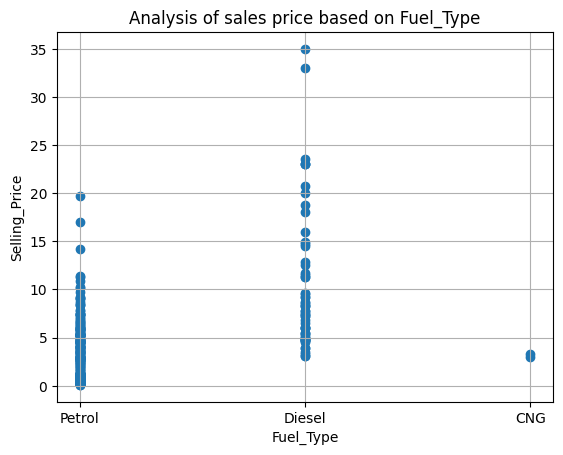

In [16]:
plt.title('Analysis of sales price based on Fuel_Type')
plt.scatter(df.Fuel_Type, df.Selling_Price)
plt.xlabel('Fuel_Type')
plt.ylabel('Selling_Price')
plt.grid()
plt.savefig('Fuel_Type_Selling_Price', bbox_inches= 'tight', pad_inches=1)
plt.show()

در قسمت نوع فروش دلال به قیمت بیشتری از فروش شخصی فروخته 

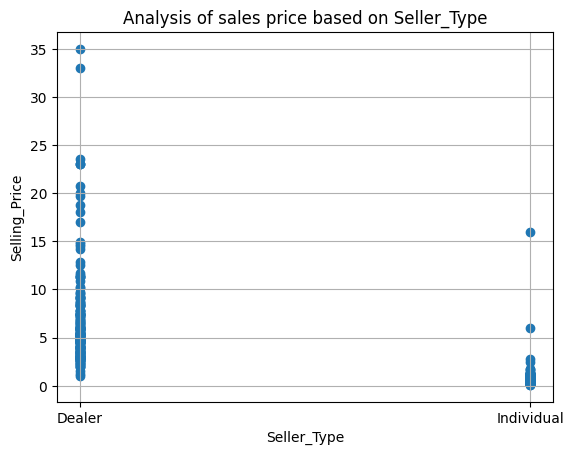

In [17]:
plt.title('Analysis of sales price based on Seller_Type')
plt.scatter(df.Seller_Type, df.Selling_Price)
plt.xlabel('Seller_Type')
plt.ylabel('Selling_Price')
plt.grid()
plt.savefig('Seller_Type_Selling_Price', bbox_inches= 'tight', pad_inches=1)
plt.show()

در این قسمت خودرو دنده اتومات بازه قیمتی بیشتری داشته نسبت به دنده ای

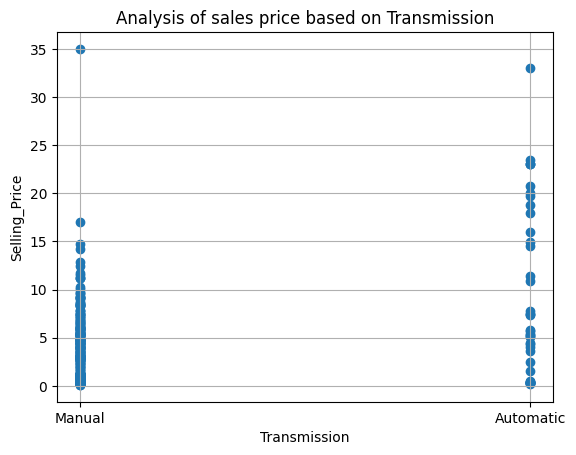

In [18]:
plt.title('Analysis of sales price based on Transmission')
plt.scatter(df.Transmission, df.Selling_Price)
plt.xlabel('Transmission')
plt.ylabel('Selling_Price')
plt.grid()
plt.savefig('Transmission_Selling_Price', bbox_inches= 'tight', pad_inches=1)
plt.show()

در این قسمت مشاهده میشود که هر چی تعداد افراد ملک کمتر بازه قیمتی بیشتر و تعدداد فروش بیشتر شده است

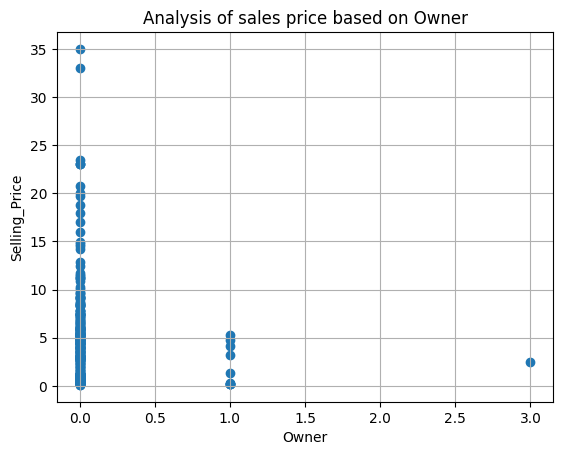

In [19]:
plt.title('Analysis of sales price based on Owner')
plt.scatter(df.Owner, df.Selling_Price)
plt.xlabel('Owner')
plt.ylabel('Selling_Price')
plt.grid()
plt.savefig('Owner_Selling_Price', bbox_inches= 'tight', pad_inches=1)
plt.show()

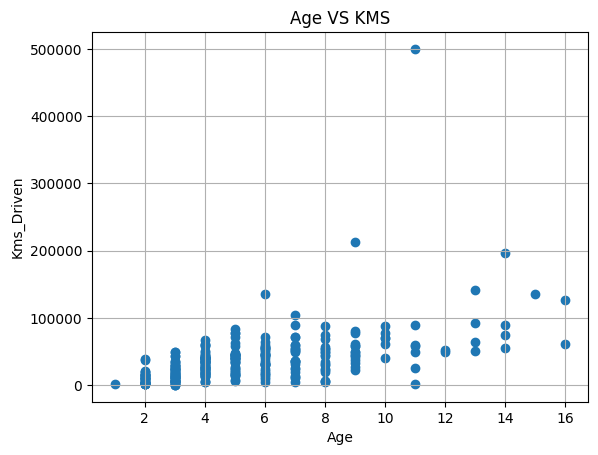

In [20]:
plt.title('Age VS KMS')
plt.scatter(df.Age, df.Kms_Driven)
plt.xlabel('Age')
plt.ylabel('Kms_Driven')
plt.grid()
plt.savefig('Age_Kms_Driven', bbox_inches= 'tight', pad_inches=1)
plt.show()

<h1> بررسی اینکه چند نوع استرینک در هر ستون وجود دارد <h1>

In [21]:
set(df.Seller_Type)

{'Dealer', 'Individual'}

In [22]:
set(df.Transmission)

{'Automatic', 'Manual'}

In [23]:
set(df.Fuel_Type)

{'CNG', 'Diesel', 'Petrol'}

In [24]:
set(df.Owner)

{0, 1, 3}

<h1>پیدا کردن نوز ها و ایندکس آنها<h1>

In [25]:
df_drop = df[df['Selling_Price']> 25]
df.nlargest(5, columns='Selling_Price')

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
86,2010,9,35.0,92.60,78000,Diesel,Dealer,Manual,0
64,2017,2,33.0,36.23,6000,Diesel,Dealer,Automatic,0
63,2015,4,23.5,35.96,47000,Diesel,Dealer,Automatic,0
51,2015,4,23.0,30.61,40000,Diesel,Dealer,Automatic,0
82,2017,2,23.0,25.39,15000,Diesel,Dealer,Automatic,0


<h1>حذف نویز پیدا شده<h1>

In [26]:
df.drop(64, inplace=True)

In [27]:
df.drop(86, inplace=True)

<h1>پیدا کردن نویز ها و ایندکس آنها<h1>

In [28]:
df_drop = df[df['Kms_Driven']> 400000]
df.nlargest(10, columns='Kms_Driven')

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
196,2008,11,0.17,0.52,500000,Petrol,Individual,Automatic,0
179,2010,9,0.31,1.05,213000,Petrol,Individual,Manual,0
84,2005,14,3.49,13.46,197176,Diesel,Dealer,Manual,0
85,2006,13,2.50,23.73,142000,Petrol,Individual,Automatic,3
77,2004,15,1.50,12.35,135154,Petrol,Dealer,Automatic,0
53,2013,6,16.00,30.61,135000,Diesel,Individual,Automatic,0
37,2003,16,0.35,2.28,127000,Petrol,Individual,Manual,0
50,2012,7,14.90,30.61,104707,Diesel,Dealer,Automatic,0
200,2006,13,0.10,0.75,92233,Petrol,Individual,Manual,0
54,2005,14,2.75,10.21,90000,Petrol,Individual,Manual,0


<h1>حذف نویز پیدا شده<h1>

In [29]:
df.drop(196, inplace=True)

In [30]:
df.drop(179, inplace=True)

In [31]:
# df.drop(84, inplace=True)

<h1>بررسی مجدد با رسم پلات برای  مطمین شدن از حذف درسته نویز ها<h1>

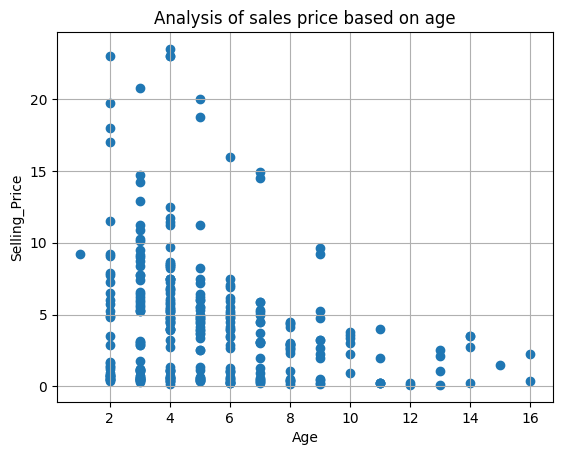

In [32]:
plt.title('Analysis of sales price based on age')
plt.scatter(df.Age, df.Selling_Price)
plt.xlabel('Age')
plt.ylabel('Selling_Price')
plt.grid()
plt.savefig('Age_Selling_Price_cut_noise', bbox_inches= 'tight', pad_inches=1)
plt.show()

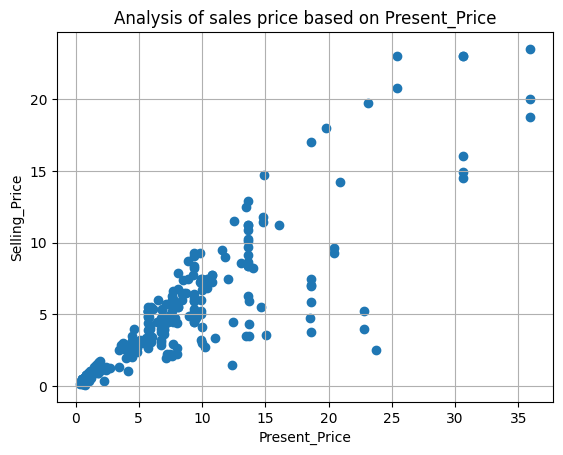

In [33]:
plt.title('Analysis of sales price based on Present_Price')
plt.scatter(df.Present_Price, df.Selling_Price)
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')
plt.grid()
plt.savefig('Present_Price_Selling_Price_cut_noise', bbox_inches= 'tight', pad_inches=1)
plt.show()

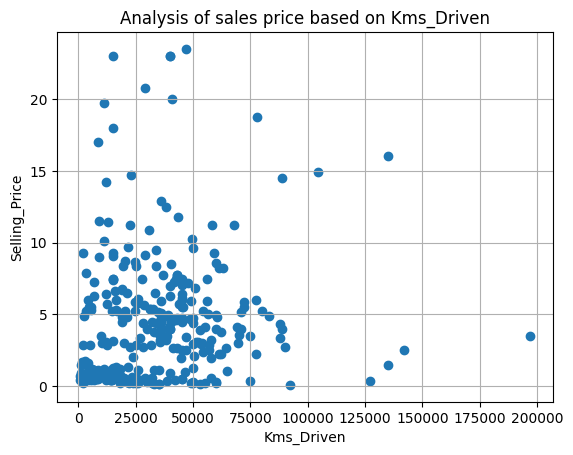

In [34]:
plt.title('Analysis of sales price based on Kms_Driven')
plt.scatter(df.Kms_Driven, df.Selling_Price)
plt.xlabel('Kms_Driven')
plt.ylabel('Selling_Price')
plt.grid()
plt.savefig('Kms_Driven_Selling_Price_cut_noise', bbox_inches= 'tight', pad_inches=1)
plt.show()

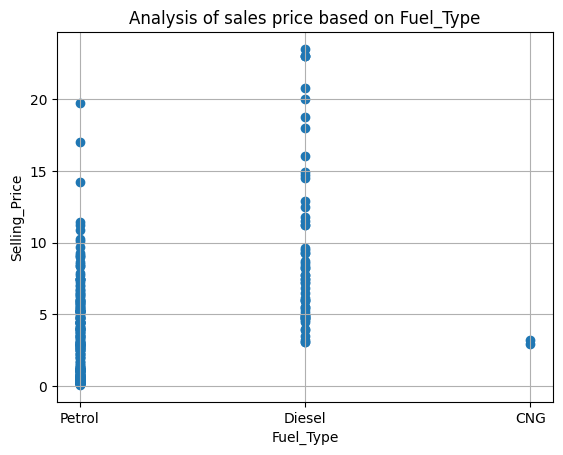

In [35]:
plt.title('Analysis of sales price based on Fuel_Type')
plt.scatter(df.Fuel_Type, df.Selling_Price)
plt.xlabel('Fuel_Type')
plt.ylabel('Selling_Price')
plt.grid()
plt.savefig('Fuel_Type_Selling_Price_cut_noise', bbox_inches= 'tight', pad_inches=1)
plt.show()

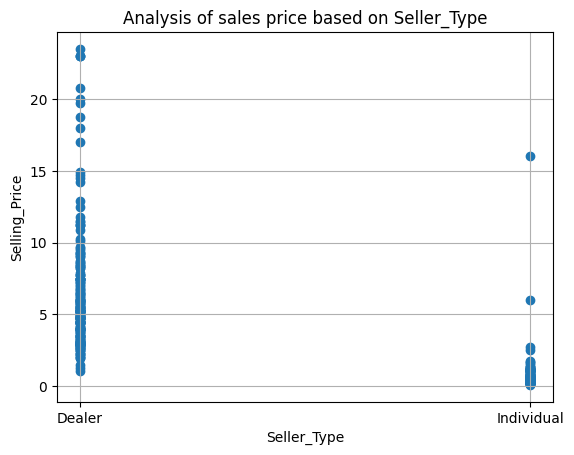

In [36]:
plt.title('Analysis of sales price based on Seller_Type')
plt.scatter(df.Seller_Type, df.Selling_Price)
plt.xlabel('Seller_Type')
plt.ylabel('Selling_Price')
plt.grid()
plt.savefig('Seller_Type_Selling_Price_cut_noise', bbox_inches= 'tight', pad_inches=1)
plt.show()

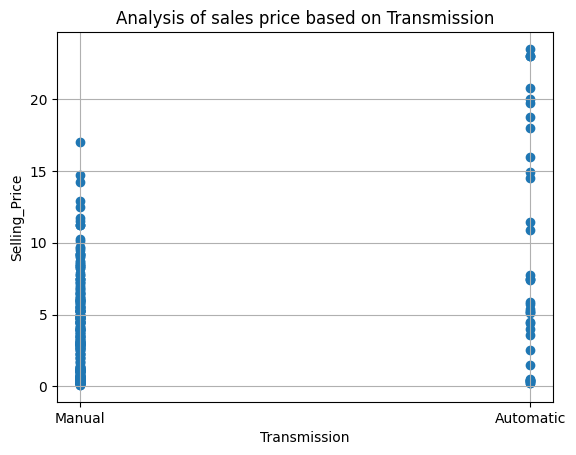

In [37]:
plt.title('Analysis of sales price based on Transmission')
plt.scatter(df.Transmission, df.Selling_Price)
plt.xlabel('Transmission')
plt.ylabel('Selling_Price')
plt.grid()
plt.savefig('Transmission_Selling_Price_cut_noise', bbox_inches= 'tight', pad_inches=1)
plt.show()

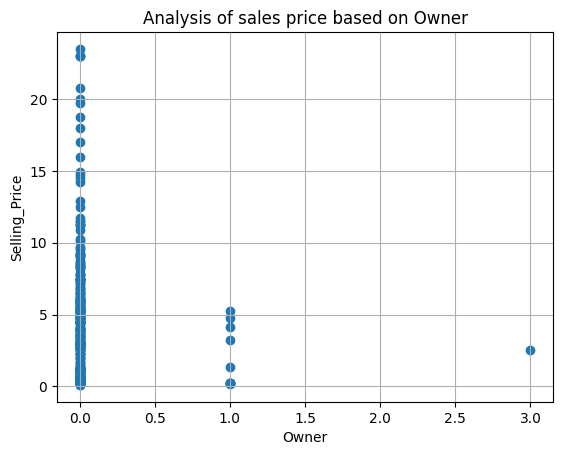

In [38]:
plt.title('Analysis of sales price based on Owner')
plt.scatter(df.Owner, df.Selling_Price)
plt.xlabel('Owner')
plt.ylabel('Selling_Price')
plt.grid()
plt.savefig('Owner_Selling_Price_cut_noise', bbox_inches= 'tight', pad_inches=1)
plt.show()

<h1> جایگزینی عدد بجای استرینگ های موجود در دیتاست<h1>

In [39]:
df.replace('Dealer', 1, inplace=True)

In [40]:
df.replace('Individual', 2, inplace=True)

In [41]:
df.replace('Automatic', 2, inplace=True)

In [42]:
df.replace('Manual', 1, inplace=True)

In [43]:
df.replace('Petrol', 2, inplace=True)

In [44]:
df.replace('Diesel', 3, inplace=True)

In [45]:
df.replace('CNG', 1, inplace=True)

In [46]:
# df.drop('Year', axis=1, inplace=True)

<h1>ساخت فرمول برای اضافه کردن توان های اضافی به دیتاست<h1>

In [47]:
Year2 = df.Year ** 2
Year3 = df.Year ** 3
Age2 = df.Age ** 2
Age3 = df.Age ** 3
Age4 = df.Age ** 4
Kms_Driven2 = df.Kms_Driven	 ** 2
Kms_Driven3 = df.Kms_Driven	 ** 3
Kms_Driven4 = df.Kms_Driven	 ** 4
SinAge = np.sin((2 * np.pi * df.Age) / 365)
SinKms_Driven = np.sin((2 * np.pi * df.Age) / 365)
Transmission2 = df.Transmission ** 2
Transmission3 = df.Transmission ** 3
Present_Price2 = df.Present_Price ** 2
Present_Price3 = df.Present_Price ** 3
Present_Price4 = df.Present_Price ** 4
Fuel_Type3 = df.Fuel_Type ** 3
Fuel_Type5 = df.Fuel_Type ** 5
Owner2 = df.Owner ** 2
Owner3 = df.Owner ** 3
SinOwner = np.sin((2 * np.pi * df.Owner) / 365)
com_age_km = df.Kms_Driven * df.Age
# com_age_km2 = (df.Kms_Driven * df.Age) ** 2

In [48]:
# df.insert(2, 'Year2', Year2)

<h1>اضافه کردن فرمول های ریاضی (توان های بالاتر به دیتاست)<h1>

In [49]:
df.insert(2, 'Age2', Age2)
df.insert(3, 'Age3', Age3)
# df.insert(4, 'Age4', Age4)
# df.insert(4, 'AgeSin', SinAge)

df.insert(7, 'Kms_Driven2', Kms_Driven2)
df.insert(8, 'Kms_Driven3', Kms_Driven3)
df.insert(9, 'Kms_Driven4', Kms_Driven4)

# df.insert(10, 'SinKms_Driven', SinKms_Driven)

# df.insert(13, 'Transmission2', Transmission2)
# df.insert(12, 'Transmission3', Transmission3)

# df.insert(6, 'Present_Price2', Present_Price2)
# df.insert(7, 'Present_Price3', Present_Price3)
# df.insert(8, 'Present_Price4', Present_Price3)

# df.insert(9, 'Fuel_Type3', Fuel_Type3)
# # df.insert(10, 'Fuel_Type5', Fuel_Type5)

# df.insert(17, 'Owner2', Owner2)
# df.insert(18, 'Owner3', Owner3)
# df.insert(14, 'SinOwner', SinOwner)
# df.insert(14, 'com_age_km', com_age_km)
# df.insert(15, 'com_age_km2', com_age_km2)

In [50]:
df

,Year,Age,Age2,Age3,Selling_Price,Present_Price,Kms_Driven,Kms_Driven2,Kms_Driven3,Kms_Driven4,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5,25,125,3.35,5.59,27000,729000000,19683000000000,531441000000000000,2,1,1,0
1,2013,6,36,216,4.75,9.54,43000,1849000000,79507000000000,3418801000000000000,3,1,1,0
2,2017,2,4,8,7.25,9.85,6900,47610000,328509000000,2266712100000000,2,1,1,0
3,2011,8,64,512,2.85,4.15,5200,27040000,140608000000,731161600000000,2,1,1,0
4,2014,5,25,125,4.60,6.87,42450,1802002500,76495006125000,3247213010006250000,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,3,9,27,9.50,11.60,33988,1155184144,39262398686272,1334450406549012736,3,1,1,0
297,2015,4,16,64,4.00,5.90,60000,3600000000,216000000000000,-5486744073709551616,2,1,1,0
298,2009,10,100,1000,3.35,11.00,87934,7732388356,679939837696504,4449597466875727888,2,1,1,0
299,2017,2,4,8,11.50,12.50,9000,81000000,729000000000,6561000000000000,3,1,1,0


<h1>ساخت مدل ماشین لرنینک و تست  مدل<h1>

In [51]:
#! نرمالایز کردن اعداد
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
normal = scaler.fit_transform(df)
normal_df = pd.DataFrame(normal, columns=['Year','Age', 'Age2', 'Age3', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Kms_Driven2', 'Kms_Driven3', 'Kms_Driven4', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'])

In [52]:
#! تبدیل به ایکس و ایگرگ
X = pd.DataFrame(normal_df, columns=['Year', 'Age', 'Age2', 'Age3', 'Present_Price', 'Kms_Driven','Kms_Driven2', 'Kms_Driven3', 'Kms_Driven4', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'])
y = pd.DataFrame(normal_df.Selling_Price).values.reshape(-1, 1)

In [53]:
#! ساخت تست و ترین
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [54]:
#! ایجاد و استفاده از الگوریتم رگرشن
model = LinearRegression()

In [55]:
#! تولید فولد برای کراس ولیدیشن
model_kf = KFold(10)

In [56]:
#! دریافت خروجی از کراس ولیدشن اسکور از دیتاست برای بررسی امتیاز هر فولد
result_validation = cross_val_score(model, X_train, y_train, cv= model_kf)

در این قسمت با مشاهده کرولیشن میفهمیم فولد دوم اسکور کمی دارد

In [57]:
result_validation

array([0.84316548, 0.33495908, 0.79702558, 0.8348067 , 0.88062928,
       0.89541322, 0.90914577, 0.78073436, 0.86812581, 0.7665871 ])

In [58]:
print(np.mean(result_validation)) #! میانگین اسکور های کراس ولیدیشن از نمونه

0.7910592378603037


<h1>کرولیشن<h1>

<h3> تک تک فیچر ها باید کرولیشن رو داشته باشیم برای اینکه بفهمیمم کدام فیچر برای ماشین قلبل لمس و درک بوده اگه نتونسه باشه اون فیچری رو که مهمه خوب بفهمه باید با فورمول ریاضی کمکش کنیم تا درکش از اون فیچذ مهم رو بالا ببره<h3>

In [59]:
comp_Year_scores = np.corrcoef(normal_df.Year, normal_df.Selling_Price)
comp_Year_scores


array([[1.        , 0.26612254],
       [0.26612254, 1.        ]])

In [60]:
# plt.scatter(normal_df.Year, normal_df.Selling_Price)

In [61]:
comp_Age_scores = np.corrcoef(normal_df.Age, normal_df.Selling_Price)
comp_Age_scores


array([[ 1.        , -0.26612254],
       [-0.26612254,  1.        ]])

In [62]:
# plt.scatter(normal_df.Age, normal_df.Selling_Price)

In [63]:
comp_Present_Price_scores = np.corrcoef(normal_df.Present_Price, normal_df.Selling_Price)
comp_Present_Price_scores


array([[1.        , 0.87964703],
       [0.87964703, 1.        ]])

In [64]:
comp_Kms_Driven_scores = np.corrcoef(normal_df.Kms_Driven, normal_df.Selling_Price)
comp_Kms_Driven_scores


array([[1.        , 0.11731136],
       [0.11731136, 1.        ]])

In [65]:
comp_Fuel_Type_scores = np.corrcoef(normal_df.Fuel_Type, normal_df.Selling_Price)
comp_Fuel_Type_scores


array([[1.        , 0.53496845],
       [0.53496845, 1.        ]])

In [66]:
comp_Seller_Type_scores = np.corrcoef(normal_df.Seller_Type, normal_df.Selling_Price)
comp_Seller_Type_scores

array([[ 1.        , -0.59066591],
       [-0.59066591,  1.        ]])

In [67]:
comp_Transmission_scores = np.corrcoef(normal_df.Transmission, normal_df.Selling_Price)
comp_Transmission_scores

array([[1.        , 0.38836579],
       [0.38836579, 1.        ]])

In [68]:
comp_Owner_scores = np.corrcoef(normal_df.Owner, normal_df.Selling_Price)
comp_Owner_scores

array([[ 1.        , -0.09402943],
       [-0.09402943,  1.        ]])

In [69]:
model.fit(X_train, y_train) #! مدل رو با ایکس و ایگرگ تریت خود با الگوریتم فیت میکنیم

LinearRegression()

In [70]:
y_pred = model.predict(X_test) #! حالا شروع به پردیکت ایگرگ تست از روی مقدار ایکسش میکنیم

<h3>بررسی بصری اینکه مدل ما چقدر درست تشخیص داده داده هارو با مقایسه ایگرگ پردیکت و ایگرگ تست که داشتیم<h3>

در بررسی اسکتر های پایین به این که مدل ساخته شده خوب است پی میبریم چون فاصله بین نقاط اکثرا کم است بنابرایم مدل ما خوب است

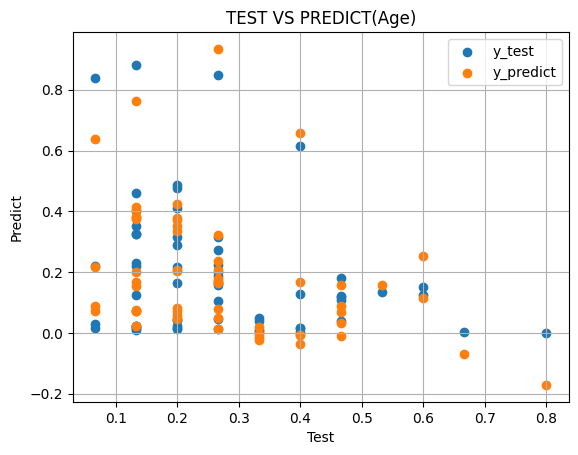

In [71]:
plt.title('TEST VS PREDICT(Age)')
plt.scatter(X_test.Age, y_test, label= 'y_test')
plt.scatter(X_test.Age, y_pred, label= 'y_predict')
plt.xlabel('Test')
plt.ylabel('Predict')
plt.legend()
plt.grid()
plt.savefig('test_predict_Age', bbox_inches='tight',pad_inches= 1 )
plt.show()


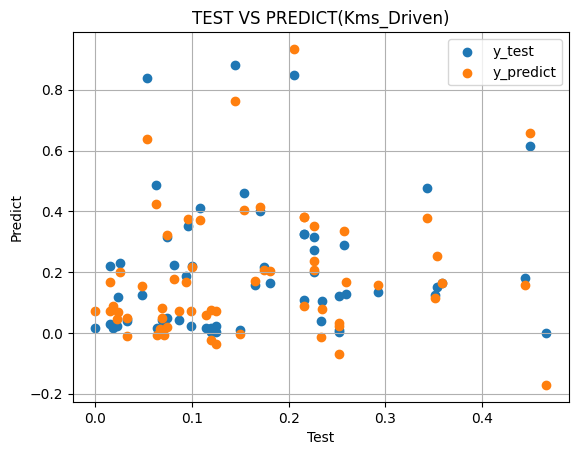

In [72]:
plt.title('TEST VS PREDICT(Kms_Driven)')
plt.scatter(X_test.Kms_Driven, y_test, label= 'y_test')
plt.scatter(X_test.Kms_Driven, y_pred, label= 'y_predict')
plt.xlabel('Test')
plt.ylabel('Predict')
plt.legend()
plt.grid()
plt.savefig('test_predict_km', bbox_inches= 'tight', pad_inches=1)
plt.show()

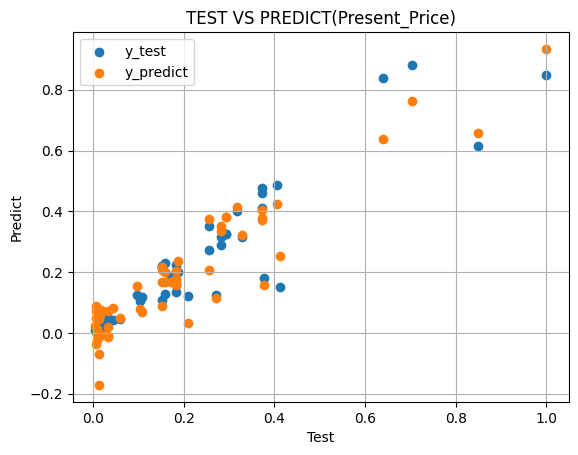

In [73]:
plt.title('TEST VS PREDICT(Present_Price)')
plt.scatter(X_test.Present_Price, y_test, label= 'y_test')
plt.scatter(X_test.Present_Price, y_pred, label= 'y_predict')
plt.xlabel('Test')
plt.ylabel('Predict')
plt.legend()
plt.grid()
plt.savefig('test_predict_present_price', bbox_inches='tight', pad_inches=1)
plt.show()

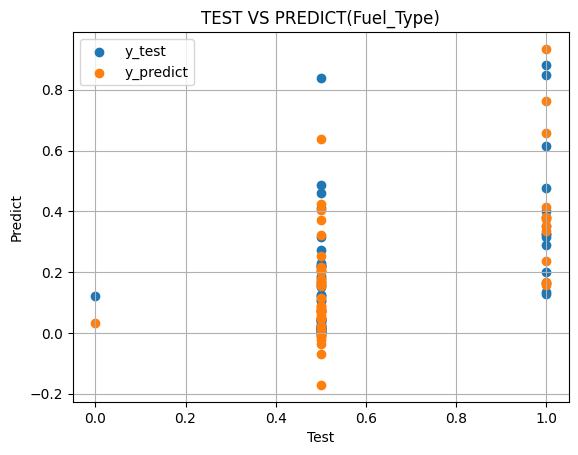

In [74]:
plt.title('TEST VS PREDICT(Fuel_Type)')
plt.scatter(X_test.Fuel_Type, y_test, label= 'y_test')
plt.scatter(X_test.Fuel_Type, y_pred, label= 'y_predict')
plt.xlabel('Test')
plt.ylabel('Predict')
plt.legend()
plt.grid()
plt.savefig('test_predict_fuel_type', bbox_inches='tight', pad_inches=1)
plt.show()

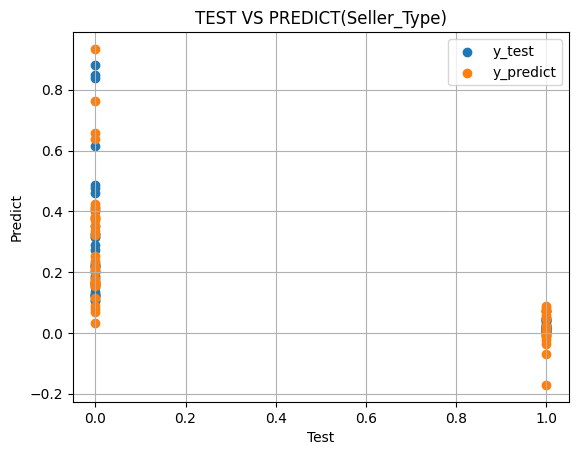

In [75]:
plt.title('TEST VS PREDICT(Seller_Type)')
plt.scatter(X_test.Seller_Type, y_test, label= 'y_test')
plt.scatter(X_test.Seller_Type, y_pred, label= 'y_predict')
plt.xlabel('Test')
plt.ylabel('Predict')
plt.legend()
plt.grid()
plt.savefig('test_predict_seller_type', bbox_inches='tight', pad_inches=1)
plt.show()

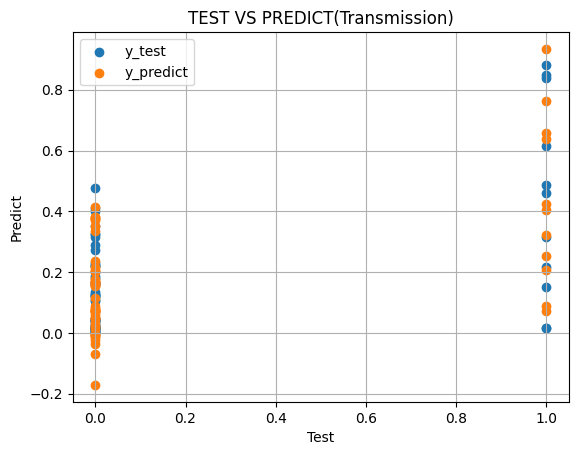

In [76]:
plt.title('TEST VS PREDICT(Transmission)')
plt.scatter(X_test.Transmission, y_test, label= 'y_test')
plt.scatter(X_test.Transmission, y_pred, label= 'y_predict')
plt.xlabel('Test')
plt.ylabel('Predict')
plt.legend()
plt.savefig('test_predict_transmission', bbox_inches='tight', pad_inches=1)
plt.grid()

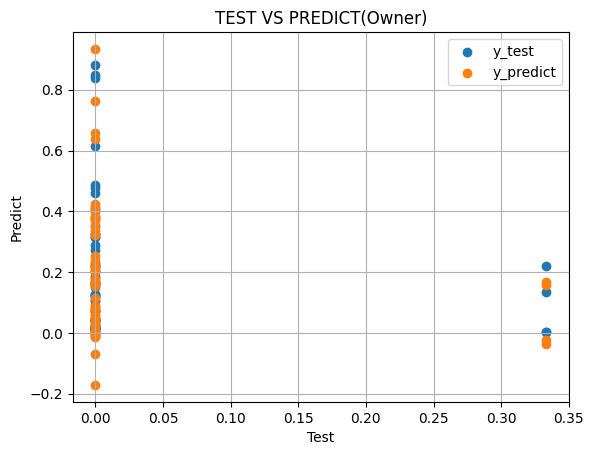

In [77]:
plt.title('TEST VS PREDICT(Owner)')
plt.scatter(X_test.Owner, y_test, label= 'y_test')
plt.scatter(X_test.Owner, y_pred, label= 'y_predict')
plt.xlabel('Test')
plt.ylabel('Predict')
plt.legend()
plt.grid()
plt.savefig('test_predict_owner', bbox_inches='tight', pad_inches=1)


In [78]:
df

,Year,Age,Age2,Age3,Selling_Price,Present_Price,Kms_Driven,Kms_Driven2,Kms_Driven3,Kms_Driven4,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5,25,125,3.35,5.59,27000,729000000,19683000000000,531441000000000000,2,1,1,0
1,2013,6,36,216,4.75,9.54,43000,1849000000,79507000000000,3418801000000000000,3,1,1,0
2,2017,2,4,8,7.25,9.85,6900,47610000,328509000000,2266712100000000,2,1,1,0
3,2011,8,64,512,2.85,4.15,5200,27040000,140608000000,731161600000000,2,1,1,0
4,2014,5,25,125,4.60,6.87,42450,1802002500,76495006125000,3247213010006250000,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,3,9,27,9.50,11.60,33988,1155184144,39262398686272,1334450406549012736,3,1,1,0
297,2015,4,16,64,4.00,5.90,60000,3600000000,216000000000000,-5486744073709551616,2,1,1,0
298,2009,10,100,1000,3.35,11.00,87934,7732388356,679939837696504,4449597466875727888,2,1,1,0
299,2017,2,4,8,11.50,12.50,9000,81000000,729000000000,6561000000000000,3,1,1,0


<h3>بررسی های عددی که مقدار ارور و اسکور و شیب و عرض از مبدا رو بررسی کنیم<h3>

In [79]:
model.coef_

array([[ 8.64873543e+11,  8.64873543e+11, -6.34338379e-01,
         7.02819824e-01,  8.16932678e-01,  3.96423340e-01,
        -2.13656616e+00,  1.53416443e+00, -3.33023071e-02,
         1.67434692e-01, -2.08091736e-02,  2.56080627e-02,
        -6.81076050e-02]])

In [80]:
model.intercept_

array([-8.64873543e+11])

In [81]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'R2_Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error: 0.044831254312455486
Mean Squared Error: 0.0033635389075315643
Root Mean Squared Error: 0.05799602492871011
R2_Score: 0.9253961400731634


اسکور و ارور هایی که بررسی شد تا به بهترین امتیاز برسد

R2_Score: 0.8540255365317553


R2_Score: 0.8886224039913444


R2_Score: 0.9034185591193427


R2_Score: 0.9166785128374881


R2_Score: 0.9031692747656203


R2_Score: 0.90844934705977


R2_Score: 0.9069000581295319


R2_Score: 0.8969572936456881


R2_Score: 0.9031254519465763


R2_Score: 0.9059720454175415


R2_Score: 0.9164588994808497

R2_Score: 0.920101620648726


R2_Score: 0.9238681541002542


R2_Score: 0.9254098724488286


R2_Score: 0.9253961400731634


In [82]:
#! بررسی مقدار عددی ایگرگ پردیکت شده با ایگرگ تست
compare = pd.DataFrame({'actual' : y_pred.flatten(),
          'predict' : y_test.flatten()})

بررسی این قسمت نشان میدهد مدل فاصله  عددی کمی با هم دارد بنابراین مدل ما خوب است

In [83]:
compare

,actual,predict
0,0.047485,0.044872
1,-0.005005,0.008547
2,-0.005493,0.014957
3,0.165405,0.164530
4,0.167969,0.188034
5,0.414307,0.401709
6,0.761475,0.882479
7,0.206299,0.215812
8,0.114502,0.123932
9,0.168579,0.220085


متصل کردن دیتا ها به هم و ساخت یه دیتاست واحد




In [84]:
X_test.insert(13, 'y_test', y_test)
X_test.insert(14, 'y_pred', y_pred)




In [85]:
X_test

,Year,Age,Age2,Age3,Present_Price,Kms_Driven,Kms_Driven2,Kms_Driven3,Kms_Driven4,Fuel_Type,Seller_Type,Transmission,Owner,y_test,y_pred
110,0.733333,0.266667,0.094118,0.030281,0.058361,0.033049,0.001254,0.000045,0.501583,0.5,1.0,0.0,0.000000,0.044872,0.047485
179,0.666667,0.333333,0.137255,0.052503,0.007295,0.149993,0.023143,0.003522,0.545583,0.5,1.0,0.0,0.000000,0.008547,-0.005005
160,0.600000,0.400000,0.188235,0.083516,0.018799,0.071183,0.005401,0.000398,0.503861,0.5,1.0,0.0,0.000000,0.014957,-0.005493
69,0.733333,0.266667,0.094118,0.030281,0.180696,0.358458,0.129655,0.046689,0.880919,1.0,0.0,0.0,0.000000,0.164530,0.165405
286,0.733333,0.266667,0.094118,0.030281,0.170595,0.094063,0.009279,0.000895,0.508552,0.5,0.0,0.0,0.000000,0.188034,0.167969
292,0.866667,0.133333,0.031373,0.006349,0.316498,0.170270,0.029707,0.005122,0.574156,1.0,0.0,0.0,0.000000,0.401709,0.414307
94,0.866667,0.133333,0.031373,0.006349,0.703423,0.144908,0.021625,0.003181,0.539987,1.0,0.0,1.0,0.000000,0.882479,0.761475
203,0.800000,0.200000,0.058824,0.015385,0.150954,0.174383,0.031138,0.005496,0.581329,0.5,0.0,1.0,0.000000,0.215812,0.206299
267,0.400000,0.600000,0.388235,0.243956,0.271605,0.351146,0.124456,0.043909,0.772117,0.5,0.0,0.0,0.000000,0.123932,0.114502
201,0.866667,0.133333,0.031373,0.006349,0.150954,0.015218,0.000307,0.000006,0.501460,0.5,0.0,0.0,0.333333,0.220085,0.168579


بررسی دقت به روی نمودار

بررسی نمودار هایی پایین نشان از ان دارد که مدل خوب اموزش دیده است چون اکثر داده ها رو لمس کرده ولی اورفیت نشده است

In [86]:
df_sort = X_test.sort_values(by='Present_Price')

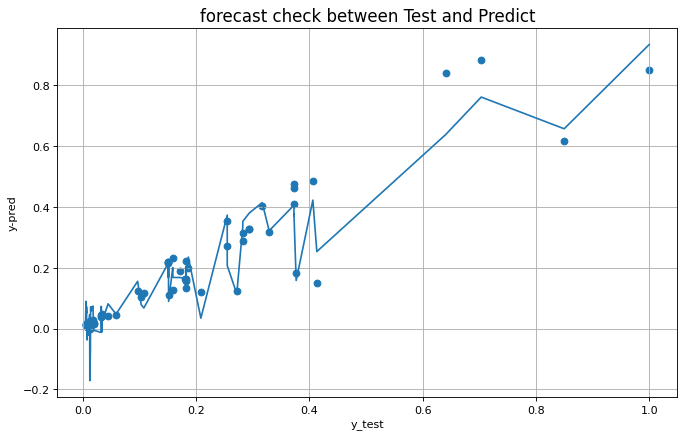

In [87]:
plt.figure(figsize=(10, 6), dpi= 80)
plt.title('forecast check between Test and Predict',fontsize=15)
plt.scatter(df_sort.Present_Price, df_sort.y_test)
plt.plot(df_sort.Present_Price, df_sort.y_pred)
plt.xlabel('y_test')
plt.ylabel('y-pred')
plt.grid()
plt.show()

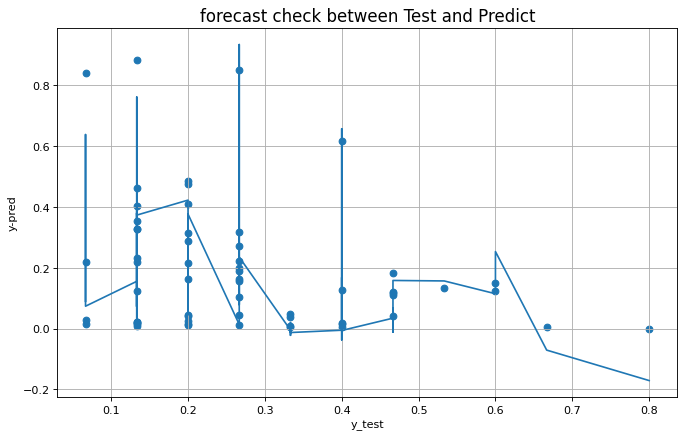

In [88]:
df_sort = X_test.sort_values(by='Age')
plt.figure(figsize=(10, 6), dpi= 80)
plt.title('forecast check between Test and Predict',fontsize=15)
plt.scatter(df_sort.Age, df_sort.y_test)
plt.plot(df_sort.Age, df_sort.y_pred)
plt.xlabel('y_test')
plt.ylabel('y-pred')
plt.grid()
plt.show()

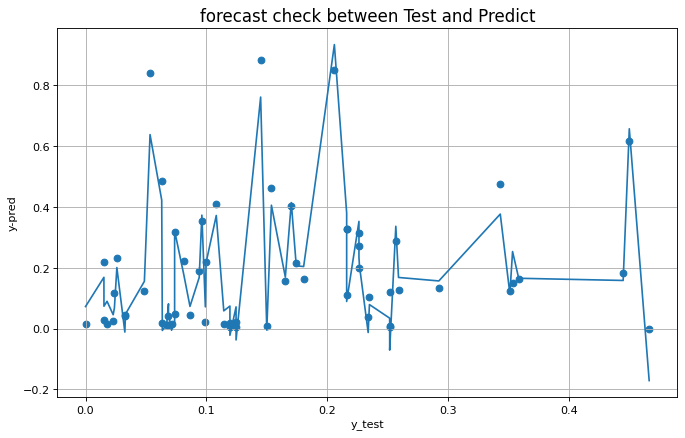

In [89]:
df_sort = X_test.sort_values(by='Kms_Driven')
plt.figure(figsize=(10, 6), dpi= 80)
plt.title('forecast check between Test and Predict',fontsize=15)
plt.scatter(df_sort.Kms_Driven, df_sort.y_test)
plt.plot(df_sort.Kms_Driven, df_sort.y_pred)
plt.xlabel('y_test')
plt.ylabel('y-pred')
plt.grid()
plt.show()

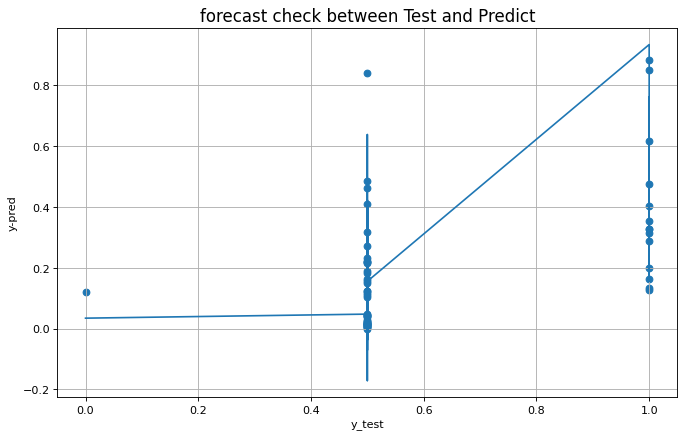

In [90]:
df_sort = X_test.sort_values(by='Fuel_Type')
plt.figure(figsize=(10, 6), dpi= 80)
plt.title('forecast check between Test and Predict',fontsize=15)
plt.scatter(df_sort.Fuel_Type, df_sort.y_test)
plt.plot(df_sort.Fuel_Type, df_sort.y_pred)
plt.xlabel('y_test')
plt.ylabel('y-pred')
plt.grid()
plt.show()

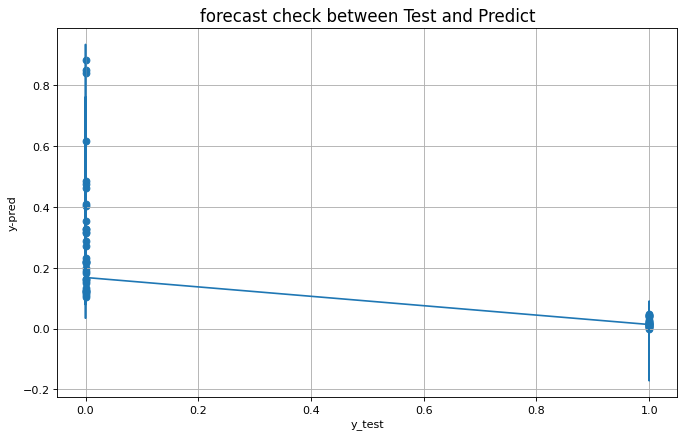

In [91]:
df_sort = X_test.sort_values(by='Seller_Type')
plt.figure(figsize=(10, 6), dpi= 80)
plt.title('forecast check between Test and Predict',fontsize=15)
plt.scatter(df_sort.Seller_Type	, df_sort.y_test)
plt.plot(df_sort.Seller_Type, df_sort.y_pred)
plt.xlabel('y_test')
plt.ylabel('y-pred')
plt.grid()
plt.show()

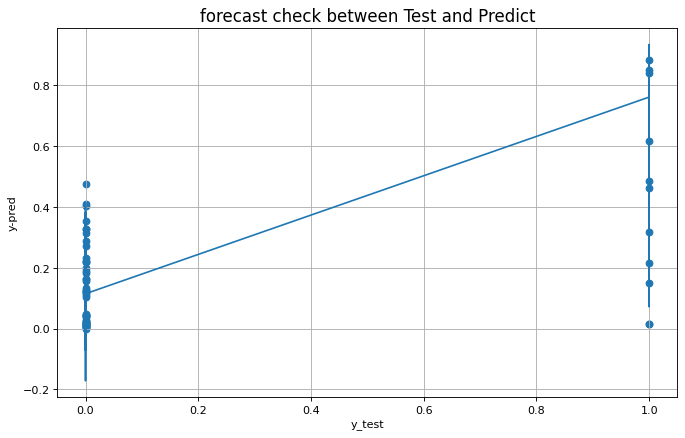

In [92]:
df_sort = X_test.sort_values(by='Transmission')
plt.figure(figsize=(10, 6), dpi= 80)
plt.title('forecast check between Test and Predict',fontsize=15)
plt.scatter(df_sort.Transmission, df_sort.y_test)
plt.plot(df_sort.Transmission, df_sort.y_pred)
plt.xlabel('y_test')
plt.ylabel('y-pred')
plt.grid()
plt.show()

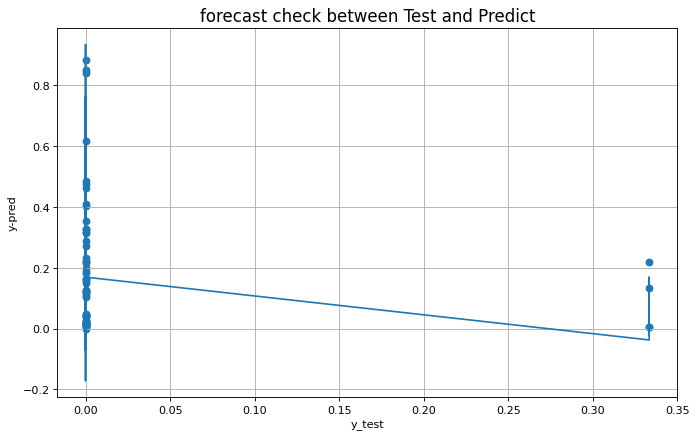

In [93]:
df_sort = X_test.sort_values(by='Owner')
plt.figure(figsize=(10, 6), dpi= 80)
plt.title('forecast check between Test and Predict',fontsize=15)
plt.scatter(df_sort.Owner, df_sort.y_test)
plt.plot(df_sort.Owner, df_sort.y_pred)
plt.xlabel('y_test')
plt.ylabel('y-pred')
plt.grid()
plt.show()

<h3>زمانی که به این اطمینان میرسیم که مدل قابل اعتماد است داده خارجی را وارد میکنیم تا مدل از روی ان برای ما تارگت را پردیکت کند<h3>

In [94]:
#? اینپوت یا داده که میخواهیم پذدیکت کنیم
df_new = pd.DataFrame({
    'Year' : [2009],
    'Age'  : [10],
    'Age2': [10 ** 2],
    'Age3': [10 ** 3],
    'Selling_Price' : [0],
    'Present_Price' : [11.23],
    'Kms_Driven' : [42000],
    'Kms_Driven2' : [42000 ** 2],
    'Kms_Driven3' : [42000 ** 3],
    'Kms_Driven4' : [42000 ** 4],
    'Fuel_Type' : [2],
    'Seller_Type' : [1],
    'Transmission' : [1],
    'Owner' : [1]
})

In [95]:
df_final = df.append(df_new) #? وارد کردن داده جدید به کل دیتاست

/var/folders/0x/4j96rnd13md_8_5yl32pjc6w0000gn/T/ipykernel_3961/464592331.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df.append(df_new) #? وارد کردن داده جدید به کل دیتاست


In [96]:
df_final

,Year,Age,Age2,Age3,Selling_Price,Present_Price,Kms_Driven,Kms_Driven2,Kms_Driven3,Kms_Driven4,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5,25,125,3.35,5.59,27000,729000000,19683000000000,531441000000000000,2,1,1,0
1,2013,6,36,216,4.75,9.54,43000,1849000000,79507000000000,3418801000000000000,3,1,1,0
2,2017,2,4,8,7.25,9.85,6900,47610000,328509000000,2266712100000000,2,1,1,0
3,2011,8,64,512,2.85,4.15,5200,27040000,140608000000,731161600000000,2,1,1,0
4,2014,5,25,125,4.60,6.87,42450,1802002500,76495006125000,3247213010006250000,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,2015,4,16,64,4.00,5.90,60000,3600000000,216000000000000,-5486744073709551616,2,1,1,0
298,2009,10,100,1000,3.35,11.00,87934,7732388356,679939837696504,4449597466875727888,2,1,1,0
299,2017,2,4,8,11.50,12.50,9000,81000000,729000000000,6561000000000000,3,1,1,0
300,2016,3,9,27,5.30,5.90,5464,29855296,163129337344,891338699247616,2,1,1,0


In [97]:
#? بررسی اینکه داده جدید و قدیمی چه موقیعتی دارند
train = df_final.iloc[ : 297]
test = df_final.iloc[297 : ]


In [98]:
print(train)

     Year  Age  Age2  Age3  Selling_Price  Present_Price  Kms_Driven  \
0    2014    5    25   125           3.35           5.59       27000   
1    2013    6    36   216           4.75           9.54       43000   
2    2017    2     4     8           7.25           9.85        6900   
3    2011    8    64   512           2.85           4.15        5200   
4    2014    5    25   125           4.60           6.87       42450   
..    ...  ...   ...   ...            ...            ...         ...   
296  2016    3     9    27           9.50          11.60       33988   
297  2015    4    16    64           4.00           5.90       60000   
298  2009   10   100  1000           3.35          11.00       87934   
299  2017    2     4     8          11.50          12.50        9000   
300  2016    3     9    27           5.30           5.90        5464   

     Kms_Driven2      Kms_Driven3          Kms_Driven4  Fuel_Type  \
0      729000000   19683000000000   531441000000000000          2 

In [99]:
print(test)

   Year  Age  Age2  Age3  Selling_Price  Present_Price  Kms_Driven  \
0  2009   10   100  1000            0.0          11.23       42000   

   Kms_Driven2     Kms_Driven3          Kms_Driven4  Fuel_Type  Seller_Type  \
0   1764000000  74088000000000  3111696000000000000          2            1   

   Transmission  Owner  
0             1      1  


In [100]:
df_final.describe()

,Year,Age,Age2,Age3,Selling_Price,Present_Price,Kms_Driven,Kms_Driven2,Kms_Driven3,Kms_Driven4,Fuel_Type,Seller_Type,Transmission,Owner
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,2.980000e+02,2.980000e+02,2.980000e+02,298.000000,298.000000,298.000000,298.000000
mean,2013.644295,5.355705,36.939597,316.348993,4.478423,7.305369,34785.600671,1.895389e+09,1.449208e+14,9.691829e+17,2.187919,1.348993,1.127517,0.046980
std,2.878163,2.878163,42.929780,595.058766,4.494527,6.930649,26223.238607,3.395436e+09,5.377951e+14,3.263436e+18,0.408151,0.477454,0.334112,0.255197
min,2003.000000,1.000000,1.000000,1.000000,0.000000,0.320000,500.000000,2.500000e+05,1.250000e+08,-9.203934e+18,1.000000,1.000000,1.000000,0.000000
25%,2012.000000,3.000000,9.000000,27.000000,0.900000,1.295000,15000.000000,2.250000e+08,3.375000e+12,5.728976e+15,2.000000,1.000000,1.000000,0.000000
50%,2014.000000,5.000000,25.000000,125.000000,3.555000,6.445000,32000.000000,1.024000e+09,3.276800e+13,3.104776e+17,2.000000,1.000000,1.000000,0.000000
75%,2016.000000,7.000000,49.000000,343.000000,6.000000,9.887500,47000.000000,2.209000e+09,1.038230e+14,2.560000e+18,2.000000,2.000000,1.000000,0.000000
max,2018.000000,16.000000,256.000000,4096.000000,23.500000,35.960000,197176.000000,3.887837e+10,7.665882e+15,9.150625e+18,3.000000,2.000000,2.000000,3.000000


In [101]:
#? نرمالایز کردن
scaler2 = preprocessing.MinMaxScaler(feature_range=(0, 1))
normal2 = scaler2.fit_transform(df_final)
normal_df2 = pd.DataFrame(normal2, columns=['Year','Age', 'Age2', 'Age3', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Kms_Driven2', 'Kms_Driven3', 'Kms_Driven4', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'])

In [102]:
normal_df2.describe()#? بررسی نمونه نرمالایز شده

,Year,Age,Age2,Age3,Selling_Price,Present_Price,Kms_Driven,Kms_Driven2,Kms_Driven3,Kms_Driven4,Fuel_Type,Seller_Type,Transmission,Owner
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,0.709620,0.290380,0.140940,0.077008,0.190571,0.195998,0.174325,0.048746,0.018905,0.554256,0.593960,0.348993,0.127517,0.015660
std,0.191878,0.191878,0.168352,0.145313,0.191256,0.194463,0.133332,0.087335,0.070154,0.177800,0.204076,0.477454,0.334112,0.085066
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.600000,0.133333,0.031373,0.006349,0.038298,0.027357,0.073725,0.005781,0.000440,0.501764,0.500000,0.000000,0.000000,0.000000
50%,0.733333,0.266667,0.094118,0.030281,0.151277,0.171857,0.160162,0.026332,0.004275,0.518368,0.500000,0.000000,0.000000,0.000000
75%,0.866667,0.400000,0.188235,0.083516,0.255319,0.268448,0.236429,0.056812,0.013543,0.640927,0.500000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h1>ساخت مدل نهایی<h1>

In [103]:
#? ایجاد تست و تریت از دیتاست
X_train2 = normal_df2[['Year','Age', 'Age2', 'Age3', 'Present_Price', 'Kms_Driven', 'Kms_Driven2', 'Kms_Driven3', 'Kms_Driven4', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']][ : 297]
y_train2 = normal_df2[['Selling_Price']][ : 297].values.reshape(-1, 1)

In [104]:
#? ساخت تست از روی نمونه جدید وارد شده به دیتاست
X_test2 = normal_df2[['Year','Age', 'Age2', 'Age3', 'Present_Price', 'Kms_Driven', 'Kms_Driven2', 'Kms_Driven3', 'Kms_Driven4', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']][297 : ]

In [105]:
#! فیت کردن داده ترین 
model.fit(X_train2, y_train2)

LinearRegression()

In [106]:
#! پردیکت کردن داده ورپدی جدید
y_pred_normal = model.predict(X_test2)

In [107]:
y_pred_normal #* عدد پردیکت شده توسط مدل

array([[0.19934082]])

   انجام مجدد مدل برای دریافت داده واقعی نرملالیز نشده دستی(خودکار نرمالایز شده توسط تایع داخلی sklearn)

In [108]:
X_train2_real = df_final[['Year','Age', 'Age2', 'Age3', 'Present_Price', 'Kms_Driven', 'Kms_Driven2', 'Kms_Driven3', 'Kms_Driven4', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']][ : 297]
y_train2_real = df_final[['Selling_Price']][ : 297].values.reshape(-1, 1)

In [109]:
X_test2_real = df_final[['Year','Age', 'Age2', 'Age3', 'Present_Price', 'Kms_Driven', 'Kms_Driven2', 'Kms_Driven3', 'Kms_Driven4', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']][297 : ]

In [110]:
model.fit(X_train2_real, y_train2_real)

LinearRegression()

In [111]:
y_pred_real = model.predict(X_test2_real)

In [112]:
y_pred_real #* عدد پردیکت شده توسط مدل

array([[4.96995251]])